# XRT Blop Demo

For ophyd beamline setup see: 
- https://github.com/NSLS-II/blop/blob/main/src/blop/sim/xrt_beamline.py
- https://github.com/NSLS-II/blop/blob/main/src/blop/sim/xrt_kb_model.py

The picture below displays beam from geometric source propagating through a pair of toroidal mirrors focusing the beam on screen. Simulation of a KB setup.

![xrt_blop_layout_w.jpg](../_static/xrt_blop_layout_w.jpg)

In [1]:
from blop.utils import prepare_re_env  # noqa
%run -i $prepare_re_env.__file__ --db-type=temp
bec.disable_plots()

In [2]:
import sys, os
from matplotlib import pyplot as plt
from blop.sim.xrt_beamline import Beamline

from blop import DOF, Objective, Agent
from blop.digestion import beam_stats_digestion
import time

In [3]:
plt.ion()

h_opt = 0
dh = 5

R1, dR1 = 40000, 10000
R2, dR2 = 20000, 10000

In [4]:
beamline = Beamline(name="bl")
time.sleep(1)
dofs = [
    DOF(description="KBV R",
        device=beamline.kbv_dsv,
        search_domain=(R1-dR1, R1+dR1)),
    DOF(description="KBH R",
        device=beamline.kbh_dsh,
        search_domain=(R2-dR2, R2+dR2)),

]

In [5]:
objectives = [
    Objective(name="bl_det_sum", 
              target="max",
              transform="log",
              trust_domain=(20, 1e12)),

    Objective(name="bl_det_wid_x",
              target="min",
              transform="log",
              # trust_domain=(0, 1e12),
              latent_groups=[("bl_kbh_dsh", "bl_kbv_dsv")]),
    Objective(name="bl_det_wid_y",
              target="min",
              transform="log",
              # trust_domain=(0, 1e12),
              latent_groups=[("bl_kbh_dsh", "bl_kbv_dsv")]),
]

In [6]:
agent = Agent(
    dofs=dofs,
    objectives=objectives,
    detectors=[beamline.det],
    digestion=beam_stats_digestion,
    digestion_kwargs={"image_key": "bl_det_image"},
    verbose=True,
    db=db,
    tolerate_acquisition_errors=False,
    enforce_all_objectives_valid=True,
    train_every=3,
)

In [7]:
RE(agent.learn("qr", n=16))
RE(agent.learn("qei", n=16, iterations=4))


2025-03-04 22:05:47.445 INFO: Executing plan <generator object Agent.learn at 0x7f138e259150>


2025-03-04 22:05:47.448 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f138f7375e0> from 'idle' -> 'running'


2025-03-04 22:05:47.449 INFO: running iteration 1 / 1




Transient Scan ID: 1     Time: 2025-03-04 22:05:47

Persistent Unique Scan ID: '3b9fe236-cb72-43e4-b8f8-6aa45d34de01'

ToroidMirror2

center:

[0, 11000, np.float64(176.33233386744536)]

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 22:05:47.6 |  30415.156 |  11555.808 |     13.658 |      178.333 |      138.750 |      356.667 |      146.500 |

|         2 | 22:05:47.8 |  36561.145 |  13103.970 |   4119.268 |      208.071 |      151.502 |      337.282 |       26.753 |

|         3 | 22:05:47.9 |  44241.688 |  10198.502 |     20.616 |      171.708 |      157.250 |      343.417 |       45.000 |

|         4 | 22:05:48.1 |  47568.617 |  14285.727 |    249.310 |      206.650 |      148.200 |      285.900 |       88.800 |

|         5 | 22:05:48.2 |  45387.438 |  15760.224 |   1396.829 |      219.200 |      147.775 |      220.000 |       95.250 |

|         6 | 22:05:48.3 |  39369.750 |  16941.980 |   2629.677 |      218.906 |      149.689 |      170.312 |       41.503 |

|         7 | 22:05:48.4 |  41435.086 |  19837.072 |  19203.276 |      205.536 |      147.211 |       22.503 |       50.295 |

|         8 | 22:05:48.6 |  43749.195 |  20947.266 |   7753.277 |      194.347 |      156.851 |       14.274 |       80.020 |

|         9 | 22:05:48.8 |  49479.578 |  24409.488 |   3459.692 |      207.122 |      149.879 |      146.769 |      123.767 |

|        10 | 22:05:48.9 |  47286.363 |  25552.189 |   3004.595 |      200.454 |      150.373 |      146.358 |      102.705 |

|        11 | 22:05:49.1 |  40930.184 |  29004.037 |   8041.268 |      205.979 |      151.879 |      254.057 |       41.974 |

|        12 | 22:05:49.2 |  38620.816 |  26753.246 |   6532.818 |      231.375 |      153.931 |      247.250 |       27.590 |

|        13 | 22:05:49.4 |  34449.238 |  27666.029 |   5975.039 |      196.643 |      152.149 |      223.529 |       61.783 |

|        14 | 22:05:49.5 |  35805.027 |  23208.434 |  17789.008 |      204.824 |      153.682 |       99.847 |       43.517 |

|        15 | 22:05:49.7 |  32257.721 |  22285.273 |   9172.649 |      204.152 |      156.237 |       78.252 |      103.143 |

|        16 | 22:05:49.8 |  32599.250 |  18479.766 |   9376.119 |      209.960 |      151.751 |       98.166 |       97.039 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['3b9fe236'] (scan num: 1)

2025-03-04 22:05:51.807 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f138f7375e0> from 'running' -> 'idle'


2025-03-04 22:05:51.808 INFO: Cleaned up from plan <generator object Agent.learn at 0x7f138e259150>


2025-03-04 22:05:51.810 INFO: Executing plan <generator object Agent.learn at 0x7f138e2590e0>


2025-03-04 22:05:51.811 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f138f7375e0> from 'idle' -> 'running'


2025-03-04 22:05:51.812 INFO: running iteration 1 / 4




Transient Scan ID: 2     Time: 2025-03-04 22:06:26

Persistent Unique Scan ID: 'd034d9f6-66a5-45ba-8079-49d00c2b185d'

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 22:06:27.1 |  35837.590 |  19881.059 |  21595.600 |      203.036 |      143.597 |       23.007 |       47.252 |

|         2 | 22:06:27.2 |  36623.141 |  20729.316 |  23120.860 |      192.545 |      151.597 |       14.145 |       32.127 |

|         3 | 22:06:27.3 |  35672.918 |  20659.869 |  22635.255 |      192.851 |      152.092 |       13.421 |       46.496 |

|         4 | 22:06:27.5 |  34272.043 |  21174.785 |  10644.588 |      197.484 |      160.889 |       15.257 |       68.011 |

|         5 | 22:06:27.6 |  37625.934 |  21128.254 |  23638.179 |      195.648 |      153.408 |       17.917 |       19.204 |

|         6 | 22:06:27.7 |  38449.359 |  21219.096 |  23650.124 |      197.947 |      153.000 |       18.083 |       19.823 |

|         7 | 22:06:27.8 |  38900.680 |  21482.746 |  23131.918 |      201.761 |      156.065 |       25.385 |       23.755 |

|         8 | 22:06:27.9 |  39897.750 |  21271.221 |  22491.932 |      199.106 |      155.590 |       17.933 |       39.780 |

|         9 | 22:06:28.0 |  39480.805 |  20936.715 |  23095.722 |      193.675 |      153.245 |       16.069 |       33.282 |

|        10 | 22:06:28.1 |  38710.594 |  20952.898 |  23479.426 |      194.197 |      152.275 |       15.134 |       20.495 |

|        11 | 22:06:28.2 |  38325.766 |  20831.508 |  23725.633 |      193.581 |      150.477 |       15.607 |       19.955 |

|        12 | 22:06:28.3 |  37465.477 |  20682.152 |  23707.312 |      192.963 |      149.909 |       13.731 |       18.773 |

|        13 | 22:06:28.4 |  38360.609 |  20428.645 |  23763.401 |      195.038 |      146.442 |       14.446 |       19.196 |

|        14 | 22:06:28.5 |  39157.422 |  20601.898 |  23267.434 |      193.737 |      149.667 |       14.269 |       26.656 |

|        15 | 22:06:28.6 |  40706.023 |  20835.723 |  22512.821 |      193.203 |      151.323 |       15.607 |       51.887 |

|        16 | 22:06:28.7 |  45507.820 |  20695.078 |   4033.439 |      193.085 |      158.767 |       15.384 |       88.600 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['d034d9f6'] (scan num: 2)

2025-03-04 22:06:30.228 INFO: running iteration 2 / 4




Transient Scan ID: 3     Time: 2025-03-04 22:06:56

Persistent Unique Scan ID: '3b9604e9-5e62-4d0d-8057-3d650690e9a1'

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 22:06:56.3 |  37860.211 |  20586.492 |  23780.751 |      193.763 |      148.395 |       14.149 |       18.999 |

|         2 | 22:06:56.5 |  31551.340 |  23868.223 |   5722.317 |      204.147 |      157.083 |      121.670 |      129.792 |

|         3 | 22:06:56.6 |  30000.000 |  26778.100 |    957.448 |      205.504 |      152.250 |      165.042 |      158.550 |

|         4 | 22:06:56.7 |  30000.000 |  27668.287 |    614.874 |      187.888 |      138.852 |      269.325 |      148.071 |

|         5 | 22:06:56.8 |  30000.000 |  30000.000 |    335.683 |      181.167 |      146.504 |      243.700 |      171.042 |

|         6 | 22:06:57.0 |  30836.461 |  29160.148 |    700.446 |      181.000 |      164.250 |      264.600 |      135.100 |

|         7 | 22:06:57.1 |  31559.953 |  28409.848 |   1158.267 |      195.250 |      156.333 |      248.500 |      122.667 |

|         8 | 22:06:57.2 |  34814.512 |  27695.354 |   7118.597 |      204.980 |      153.700 |      246.160 |       50.200 |

|         9 | 22:06:57.3 |  34814.875 |  27695.383 |   7165.271 |      191.986 |      153.883 |      223.861 |       55.598 |

|        10 | 22:06:57.5 |  46663.703 |  30000.000 |   1051.431 |      175.671 |      147.175 |      259.292 |      118.300 |

|        11 | 22:06:57.6 |  47331.797 |  30000.000 |    807.481 |      178.104 |      141.667 |      246.542 |      105.667 |

|        12 | 22:06:57.7 |  50000.000 |  30000.000 |    472.905 |      175.283 |      141.250 |      350.567 |      113.200 |

|        13 | 22:06:57.8 |  49988.961 |  29672.236 |    506.781 |      180.106 |      163.179 |      281.637 |      132.208 |

|        14 | 22:06:57.9 |  47112.570 |  28979.521 |   1226.604 |      192.879 |      153.750 |      251.208 |      109.225 |

|        15 | 22:06:58.1 |  46985.422 |  25248.680 |   3616.046 |      196.825 |      144.053 |      164.071 |      112.406 |

|        16 | 22:06:58.2 |  47456.766 |  24288.215 |   4923.767 |      205.754 |      154.198 |      133.767 |      113.809 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['3b9604e9'] (scan num: 3)

2025-03-04 22:06:59.569 INFO: running iteration 3 / 4




Transient Scan ID: 4     Time: 2025-03-04 22:07:12

Persistent Unique Scan ID: '0254cb91-e449-4121-a0c7-f5842829352a'

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 22:07:13.0 |  41616.773 |  19486.137 |  19193.270 |      208.008 |      146.416 |       48.037 |       59.260 |

|         2 | 22:07:13.1 |  39076.918 |  20274.223 |  23234.738 |      196.789 |      146.853 |       16.009 |       27.787 |

|         3 | 22:07:13.2 |  38671.656 |  20312.805 |  23456.828 |      196.422 |      146.973 |       15.170 |       21.782 |

|         4 | 22:07:13.3 |  39126.742 |  20828.336 |  23240.715 |      193.160 |      151.206 |       15.725 |       27.470 |

|         5 | 22:07:13.4 |  39102.227 |  21345.617 |  23137.191 |      199.867 |      155.115 |       21.248 |       27.669 |

|         6 | 22:07:13.5 |  38170.883 |  22002.740 |  23265.640 |      201.157 |      152.720 |       61.386 |       23.198 |

|         7 | 22:07:13.6 |  37844.156 |  21231.508 |  23704.239 |      196.992 |      153.201 |       20.385 |       20.078 |

|         8 | 22:07:13.7 |  38070.824 |  20959.410 |  23811.819 |      194.257 |      151.045 |       16.160 |       18.464 |

|         9 | 22:07:13.8 |  37929.016 |  20678.961 |  23900.100 |      193.648 |      148.963 |       13.085 |       17.546 |

|        10 | 22:07:13.9 |  38019.289 |  20613.480 |  23730.539 |      193.677 |      148.228 |       13.327 |       17.502 |

|        11 | 22:07:14.0 |  37914.594 |  20607.791 |  23717.838 |      193.538 |      148.539 |       14.641 |       18.138 |

|        12 | 22:07:14.1 |  37882.863 |  20526.438 |  23790.712 |      194.215 |      147.445 |       13.580 |       17.123 |

|        13 | 22:07:14.2 |  37029.102 |  19909.607 |  23165.410 |      200.354 |      144.721 |       26.844 |       26.792 |

|        14 | 22:07:14.3 |  36530.336 |  20551.889 |  23125.150 |      192.607 |      150.231 |       13.547 |       33.239 |

|        15 | 22:07:14.4 |  36196.125 |  19920.355 |  22153.669 |      202.379 |      145.563 |       20.165 |       37.280 |

|        16 | 22:07:14.5 |  37599.625 |  13519.312 |   1128.797 |      206.037 |      148.860 |      333.775 |       24.965 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['0254cb91'] (scan num: 4)

2025-03-04 22:07:15.862 INFO: running iteration 4 / 4


/opt/hostedtoolcache/Python/3.10.16/x64/lib/python3.10/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(


/opt/hostedtoolcache/Python/3.10.16/x64/lib/python3.10/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(


/opt/hostedtoolcache/Python/3.10.16/x64/lib/python3.10/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(


/opt/hostedtoolcache/Python/3.10.16/x64/lib/python3.10/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(


/opt/hostedtoolcache/Python/3.10.16/x64/lib/python3.10/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(


/opt/hostedtoolcache/Python/3.10.16/x64/lib/python3.10/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(


/opt/hostedtoolcache/Python/3.10.16/x64/lib/python3.10/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(


/opt/hostedtoolcache/Python/3.10.16/x64/lib/python3.10/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(


/opt/hostedtoolcache/Python/3.10.16/x64/lib/python3.10/site-packages/botorch/optim/optimize.py:326: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  generated_initial_conditions = opt_inputs.get_ic_generator()(




Transient Scan ID: 5     Time: 2025-03-04 22:07:20

Persistent Unique Scan ID: '278f01be-0442-438e-9735-0b432f7e6da4'

New stream: 'primary'

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 22:07:20.8 |  34244.465 |  12047.820 |    313.634 |      204.612 |      142.750 |      309.675 |       43.950 |

|         2 | 22:07:20.9 |  33467.023 |  14493.822 |   1011.880 |      186.333 |      165.781 |      274.733 |       58.962 |

|         3 | 22:07:21.0 |  30311.322 |  13714.491 |     76.163 |      214.733 |      200.380 |      367.067 |      196.360 |

|         4 | 22:07:21.1 |  30431.545 |  15416.307 |    309.307 |      245.938 |      146.250 |      296.375 |      130.000 |

|         5 | 22:07:21.2 |  30000.000 |  16593.555 |    683.631 |      207.308 |      146.131 |      186.565 |      163.213 |

|         6 | 22:07:21.3 |  33203.660 |  18373.043 |  10469.645 |      207.693 |      147.356 |      113.649 |       88.093 |

|         7 | 22:07:21.4 |  30000.000 |  20574.367 |   1131.149 |      191.690 |      160.600 |       11.320 |       89.000 |

|         8 | 22:07:21.5 |  30005.039 |  23143.223 |   5456.179 |      207.050 |      155.523 |       81.500 |      143.274 |

|         9 | 22:07:21.6 |  31230.809 |  25465.818 |   2526.936 |      199.783 |      153.807 |      151.267 |      134.698 |

|        10 | 22:07:21.7 |  32268.154 |  23785.072 |   7353.873 |      203.412 |      152.865 |      112.925 |      104.146 |

|        11 | 22:07:21.8 |  33822.453 |  24145.008 |  10482.050 |      202.923 |      154.879 |      119.026 |       70.603 |

|        12 | 22:07:21.9 |  37246.602 |  19994.783 |  23314.297 |      200.077 |      144.658 |       20.305 |       21.215 |

|        13 | 22:07:22.0 |  43812.984 |  26408.604 |   5207.908 |      202.910 |      150.634 |      190.080 |       79.397 |

|        14 | 22:07:22.1 |  48019.957 |  26011.668 |   2183.442 |      203.850 |      153.967 |      170.900 |      117.133 |

|        15 | 22:07:22.2 |  46714.945 |  22136.035 |   4368.480 |      201.117 |      150.828 |       78.483 |      112.844 |

|        16 | 22:07:22.3 |  47264.914 |  16714.723 |   1749.971 |      204.660 |      145.725 |      193.880 |      116.250 |

+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['278f01be'] (scan num: 5)

2025-03-04 22:07:23.433 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f138f7375e0> from 'running' -> 'idle'


2025-03-04 22:07:23.434 INFO: Cleaned up from plan <generator object Agent.learn at 0x7f138e2590e0>


('d034d9f6-66a5-45ba-8079-49d00c2b185d',
 '3b9604e9-5e62-4d0d-8057-3d650690e9a1',
 '0254cb91-e449-4121-a0c7-f5842829352a',
 '278f01be-0442-438e-9735-0b432f7e6da4')

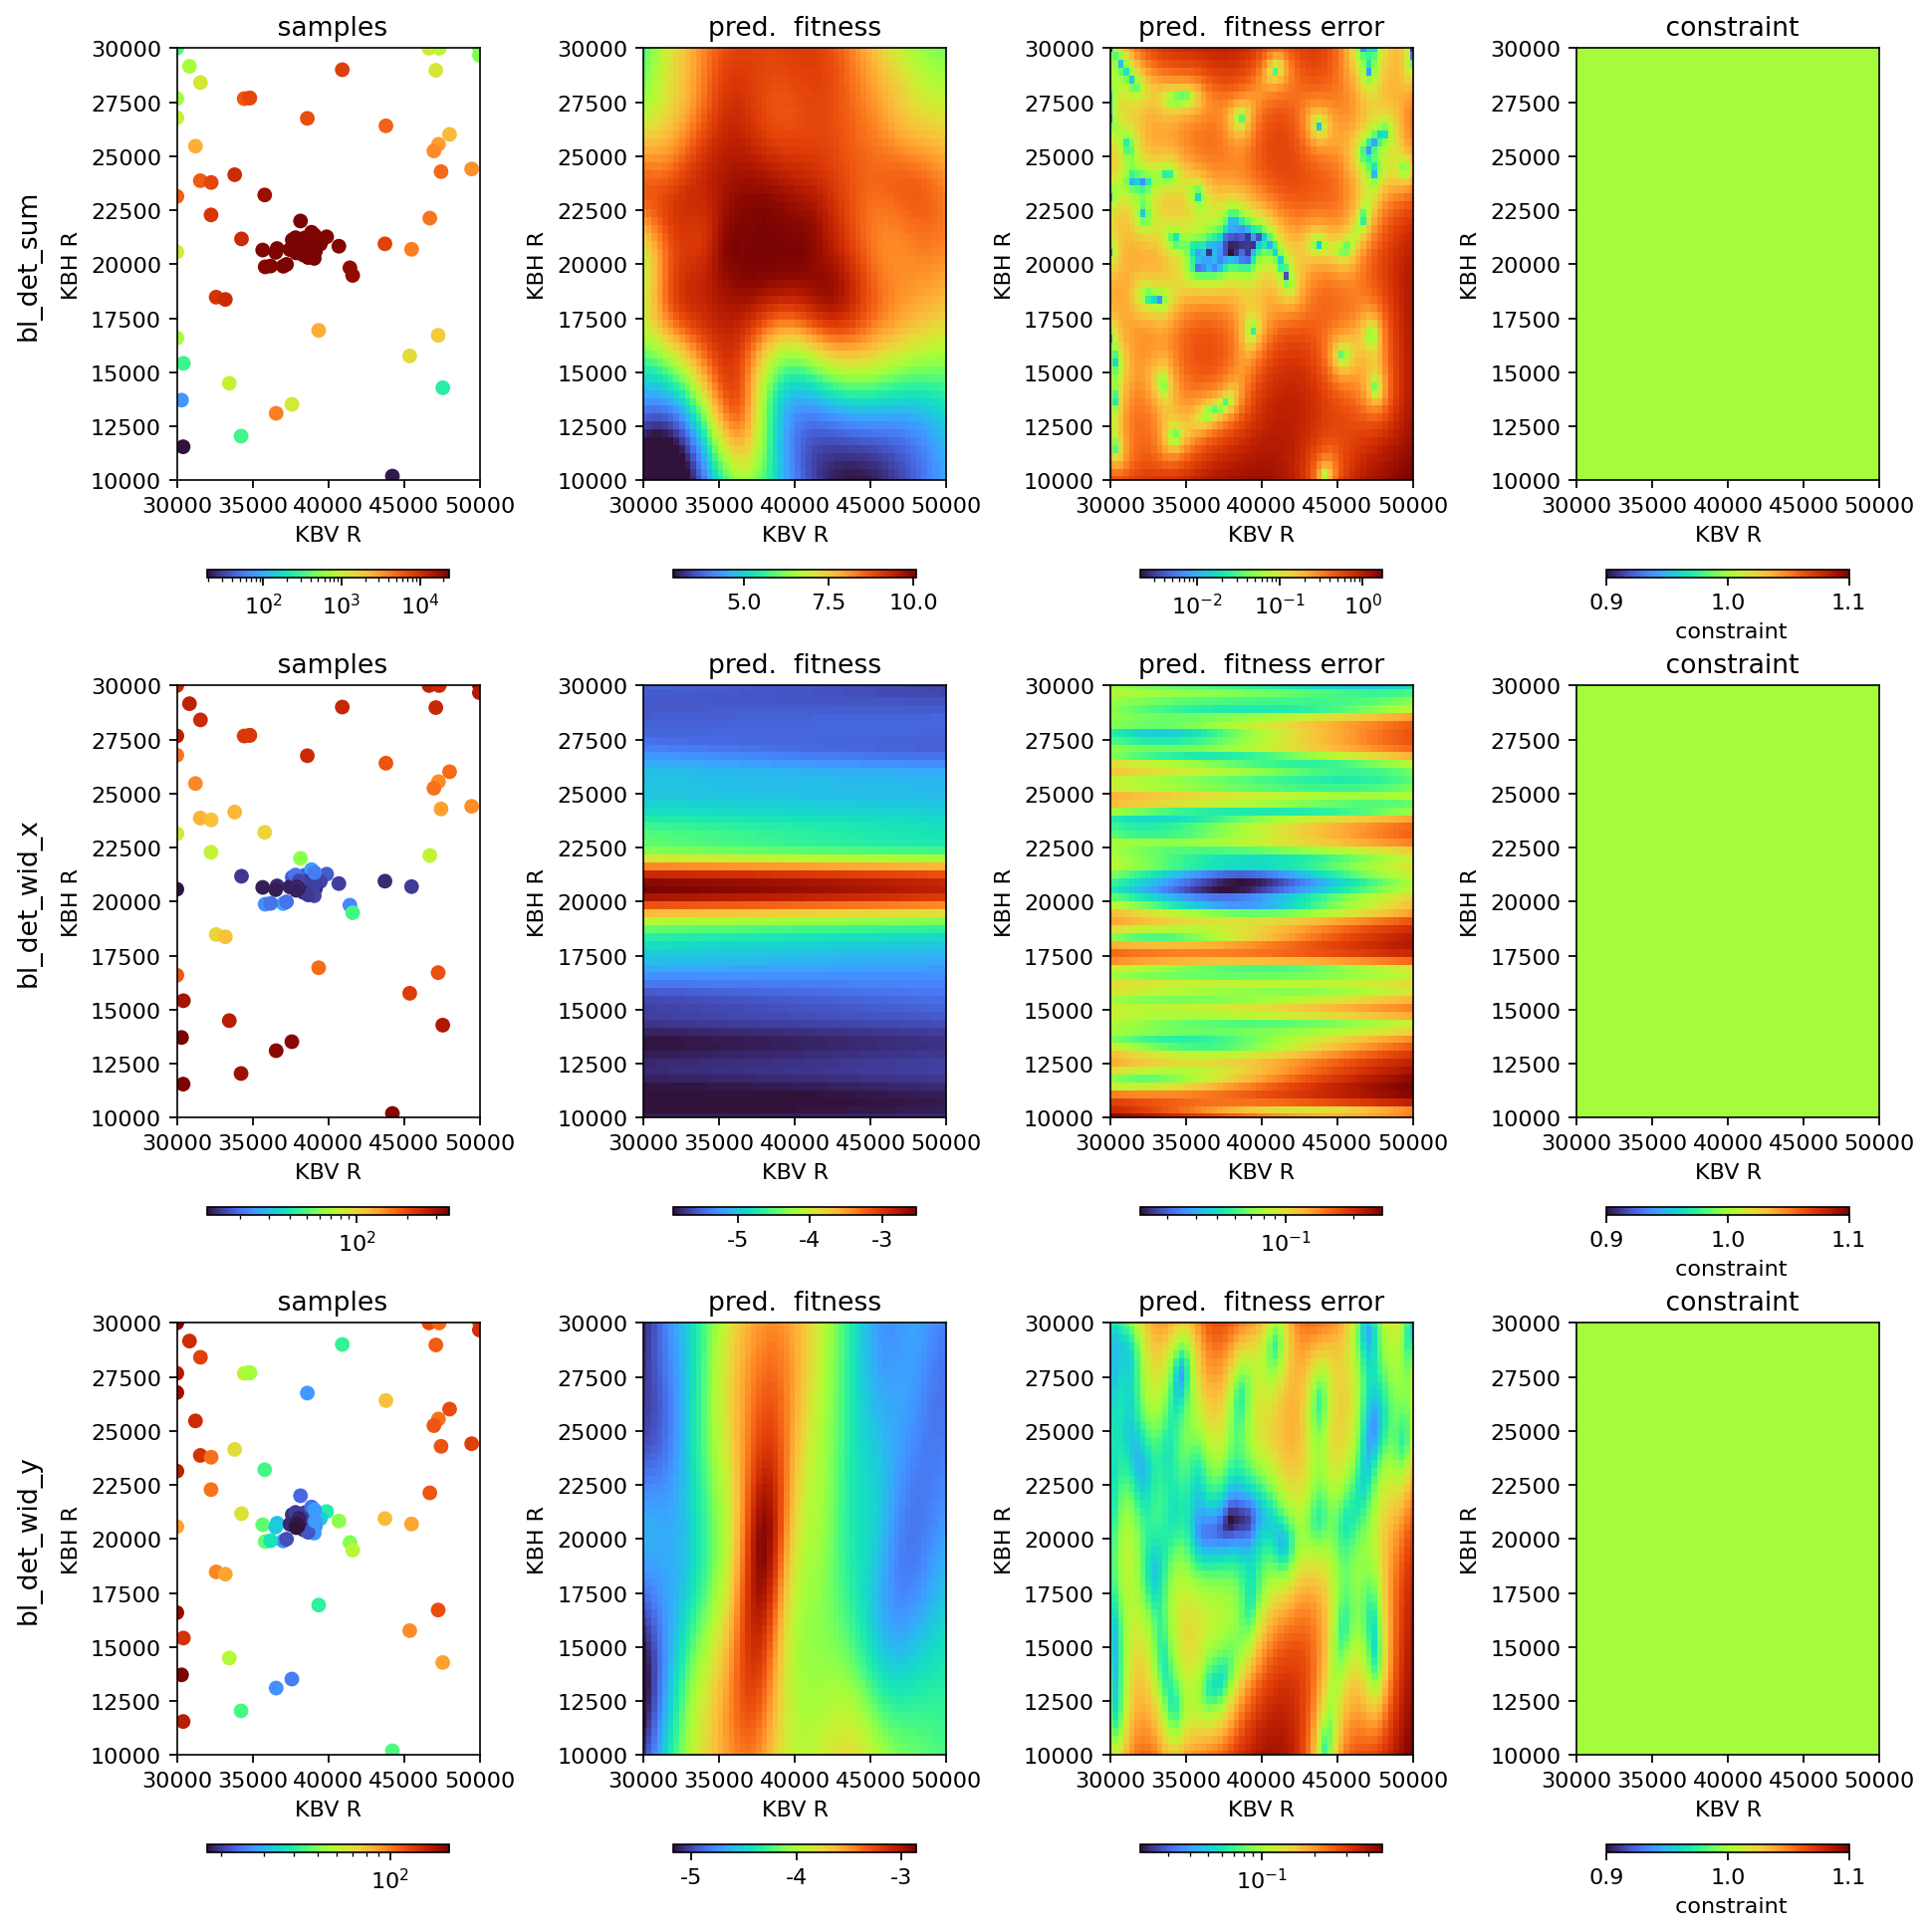

In [8]:
agent.plot_objectives(axes=(0, 1))